<a href="https://www.kaggle.com/nafishamoin/tabular-playground-november-2021?scriptVersionId=88475838" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-nov-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-nov-2021/train.csv
/kaggle/input/tabular-playground-series-nov-2021/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn

Train Dataset

In [3]:
train = pd.read_csv('../input/tabular-playground-series-nov-2021/train.csv')

In [4]:
train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
0,0,0.106643,3.59437,132.8040,3.18428,0.081971,1.18859,3.73238,2.266270,2.09959,...,1.09862,0.013331,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0.240496,0
1,1,0.125021,1.67336,76.5336,3.37825,0.099400,5.09366,1.27562,-0.471318,4.54594,...,3.46017,0.017054,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0.024719,0
2,2,0.036330,1.49747,233.5460,2.19435,0.026914,3.12694,5.05687,3.849460,1.80187,...,4.88300,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.14112,0.124464,0.148209,0
3,3,-0.014077,0.24600,779.9670,1.89064,0.006948,1.53112,2.69800,4.517330,4.50332,...,3.47439,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0.044873,0
4,4,-0.003259,3.71542,156.1280,2.14772,0.018284,2.09859,4.15492,-0.038236,3.37145,...,1.91059,-0.042943,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,0.072798,1


[Text(0.5, 0, 'id'),
 Text(4.5, 0, 'f3'),
 Text(8.5, 0, 'f7'),
 Text(12.5, 0, 'f11'),
 Text(16.5, 0, 'f15'),
 Text(20.5, 0, 'f19'),
 Text(24.5, 0, 'f23'),
 Text(28.5, 0, 'f27'),
 Text(32.5, 0, 'f31'),
 Text(36.5, 0, 'f35'),
 Text(40.5, 0, 'f39'),
 Text(44.5, 0, 'f43'),
 Text(48.5, 0, 'f47'),
 Text(52.5, 0, 'f51'),
 Text(56.5, 0, 'f55'),
 Text(60.5, 0, 'f59'),
 Text(64.5, 0, 'f63'),
 Text(68.5, 0, 'f67'),
 Text(72.5, 0, 'f71'),
 Text(76.5, 0, 'f75'),
 Text(80.5, 0, 'f79'),
 Text(84.5, 0, 'f83'),
 Text(88.5, 0, 'f87'),
 Text(92.5, 0, 'f91'),
 Text(96.5, 0, 'f95'),
 Text(100.5, 0, 'f99')]

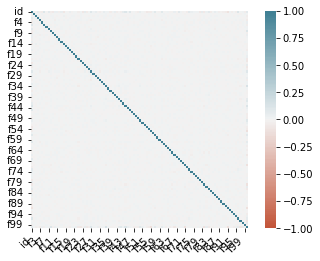

In [5]:
corr = train.corr()
ax = sn.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sn.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>,
        <AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'f3'}>,
        <AxesSubplot:title={'center':'f4'}>,
        <AxesSubplot:title={'center':'f5'}>,
        <AxesSubplot:title={'center':'f6'}>,
        <AxesSubplot:title={'center':'f7'}>,
        <AxesSubplot:title={'center':'f8'}>],
       [<AxesSubplot:title={'center':'f9'}>,
        <AxesSubplot:title={'center':'f10'}>,
        <AxesSubplot:title={'center':'f11'}>,
        <AxesSubplot:title={'center':'f12'}>,
        <AxesSubplot:title={'center':'f13'}>,
        <AxesSubplot:title={'center':'f14'}>,
        <AxesSubplot:title={'center':'f15'}>,
        <AxesSubplot:title={'center':'f16'}>,
        <AxesSubplot:title={'center':'f17'}>,
        <AxesSubplot:title={'center':'f18'}>],
       [<AxesSubplot:title={'center':'f19'}>,
        <AxesSubplot:title={'center':'f20'}

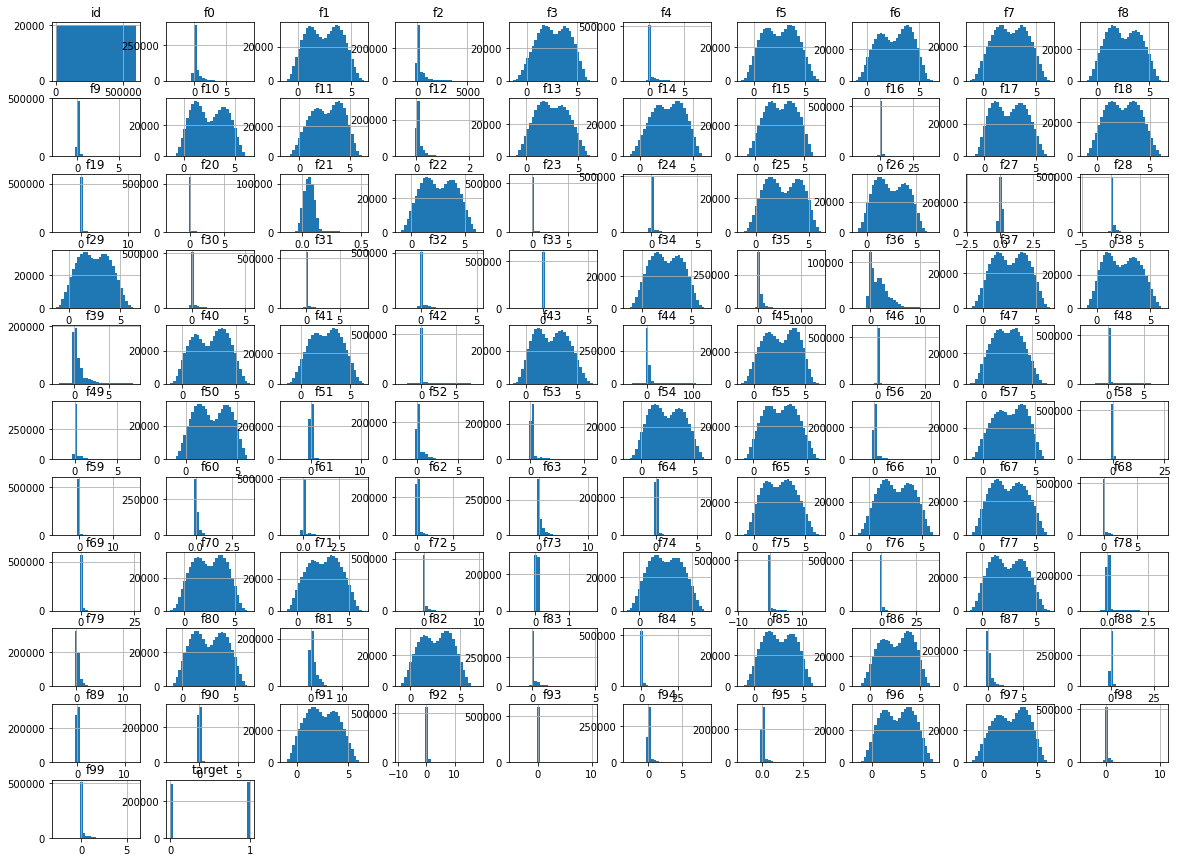

In [6]:
train.hist(bins=30, figsize=(20, 15))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 102 entries, id to target
dtypes: float64(100), int64(2)
memory usage: 466.9 MB


In [8]:
train.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,...,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,299999.500000,0.306508,2.497590,306.644536,2.647901,0.177850,2.556832,2.699650,2.571593,2.538273,...,2.444471,0.155260,0.059407,0.144932,0.106419,2.547853,2.590159,0.158881,0.123048,0.506010
std,173205.225094,0.522450,1.554018,551.743893,1.544529,0.417488,1.562527,1.564000,1.549361,1.532988,...,1.542509,0.548397,0.119426,0.462015,0.209128,1.558427,1.525091,0.436190,0.264896,0.499964
min,0.000000,-3.797450,-1.223960,-1842.530000,-1.368560,-3.206210,-1.169770,-1.059310,-1.281970,-1.242020,...,-1.217700,-9.761770,-4.666240,-3.101500,-1.276540,-1.584740,-1.254730,-3.993500,-2.783380,0.000000
25%,149999.750000,0.026222,1.186238,43.573400,1.442028,0.019709,1.261038,1.385820,1.333848,1.292163,...,1.214178,0.018904,0.024483,0.017055,0.025461,1.247888,1.348078,0.013536,0.018105,0.000000
50%,299999.500000,0.097788,2.516500,133.626000,2.634130,0.061586,2.590425,2.801255,2.557985,2.475880,...,2.386845,0.068906,0.056649,0.063439,0.062151,2.601940,2.682090,0.058058,0.058471,1.000000
75%,449999.250000,0.397184,3.787630,302.262250,3.907640,0.112712,3.813662,3.996913,3.823450,3.804360,...,3.693872,0.125165,0.088162,0.113114,0.102016,3.820665,3.839520,0.110718,0.104872,1.000000
max,599999.000000,8.781500,6.226720,6119.280000,6.521150,8.265470,6.515070,6.586780,6.258770,6.389670,...,6.573890,18.412800,10.211800,8.623270,3.657220,6.254360,6.145300,10.767000,5.988110,1.000000


In [9]:
train = train.drop(columns='id', axis=1)

In [10]:
train.isna().sum()

f0        0
f1        0
f2        0
f3        0
f4        0
         ..
f96       0
f97       0
f98       0
f99       0
target    0
Length: 101, dtype: int64

In [11]:
train.duplicated().sum()

0

In [12]:
X = train.drop(columns='target', axis=1)
Y = train['target']

In [13]:
print(X)
print(Y)

              f0        f1         f2        f3        f4       f5        f6  \
0       0.106643  3.594370   132.8040  3.184280  0.081971  1.18859  3.732380   
1       0.125021  1.673360    76.5336  3.378250  0.099400  5.09366  1.275620   
2       0.036330  1.497470   233.5460  2.194350  0.026914  3.12694  5.056870   
3      -0.014077  0.246000   779.9670  1.890640  0.006948  1.53112  2.698000   
4      -0.003259  3.715420   156.1280  2.147720  0.018284  2.09859  4.154920   
...          ...       ...        ...       ...       ...      ...       ...   
599995  0.043008  1.640550  1375.8900  1.087030  0.839580  1.69362  3.843520   
599996  0.137048  4.826860   -99.6478  0.985289  0.037712  3.30370  2.471790   
599997  1.316220  0.502062    66.2360  2.233020  0.060038  3.77371  2.655340   
599998  0.511918  3.827470   777.8720  0.285914  0.520157  2.76285  2.522200   
599999  0.179347  3.457390   160.5980  3.297320  0.102784  1.89434  0.057866   

              f7        f8        f9  .

In [14]:
print(X.shape)

(600000, 100)


In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

**LOGISTIC REGRESSION**

In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,Y)

LogisticRegression()

Test Dataset

In [17]:
test = pd.read_csv('../input/tabular-playground-series-nov-2021/test.csv')

In [18]:
test.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,600000,0.003229,4.838660,585.529,2.282910,0.713180,3.907830,0.480696,1.482270,4.891810,...,0.112910,1.073550,0.122149,0.086330,0.036010,0.010619,0.290343,1.898200,0.131533,0.012047
1,600001,0.008602,0.505536,-100.099,3.012670,0.027199,1.194610,5.036620,2.517440,4.553890,...,-0.020214,2.622340,0.123307,0.033063,0.123059,0.005771,-0.392923,3.689640,0.047418,0.120015
2,600002,1.461000,2.437260,-112.964,3.541230,0.752338,4.338310,1.648080,4.699910,1.950250,...,-0.011036,2.030180,-0.000426,0.084091,0.123605,0.499554,4.054650,3.330670,0.108843,0.064687
3,600003,0.140556,3.085610,179.451,0.573945,0.057342,2.216790,1.623480,0.526174,1.542540,...,0.050117,0.221613,0.045298,0.129966,0.004015,0.018279,2.696580,-0.533491,0.052524,0.011058
4,600004,0.128876,5.199760,107.466,-0.497149,0.080220,0.458121,0.629839,5.240460,-0.232279,...,0.058860,2.660430,0.135425,0.036481,0.093912,0.056315,1.110710,3.584470,0.145319,-0.050393


In [19]:
test.shape

(540000, 101)

In [20]:
test.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
count,5.400000e+05,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,...,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000
mean,8.699995e+05,0.348663,2.618251,263.577730,2.583735,0.211793,2.709543,2.762370,2.479384,2.549483,...,0.072670,2.600771,0.154676,0.056792,0.124517,0.092847,2.442579,2.640276,0.158335,0.140386
std,1.558847e+05,0.566251,1.543507,496.444309,1.529646,0.468154,1.568074,1.586975,1.520741,1.520833,...,0.095479,1.531937,0.546308,0.135927,0.420197,0.191741,1.567684,1.537125,0.430856,0.292759
min,6.000000e+05,-3.628650,-1.260150,-1764.160000,-1.370560,-3.868460,-1.180650,-1.126370,-1.284250,-1.084660,...,-0.610129,-1.438570,-8.970460,-5.565240,-2.958050,-1.907490,-1.939050,-1.232050,-4.537930,-2.305220
25%,7.349998e+05,0.043555,1.326280,27.361175,1.408300,0.028489,1.400490,1.433133,1.278905,1.306570,...,0.025997,1.368090,0.019573,0.019760,0.020277,0.020370,1.117510,1.385690,0.018050,0.021656
50%,8.699995e+05,0.115868,2.657140,115.631000,2.547380,0.072008,2.797510,2.892945,2.456350,2.485895,...,0.059437,2.576965,0.067471,0.051755,0.064928,0.056317,2.458465,2.740695,0.063792,0.061905
75%,1.004999e+06,0.457940,3.884850,245.446250,3.812990,0.125637,3.982830,4.083213,3.694180,3.811365,...,0.094415,3.859483,0.122299,0.083540,0.110353,0.095058,3.737155,3.903460,0.115588,0.108654
max,1.139999e+06,8.666950,6.434070,6098.190000,6.275570,7.915200,6.444200,6.726750,6.339400,6.180310,...,1.966860,6.380110,19.249500,11.484900,8.493580,4.097870,6.210380,6.421930,10.777000,5.414280


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Columns: 101 entries, id to f99
dtypes: float64(100), int64(1)
memory usage: 416.1 MB


In [22]:
test = test.drop(columns='id', axis=1)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test=sc.fit_transform(test)

In [24]:
pred = model.predict(test)

In [25]:
pred.shape

(540000,)

In [26]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
sub = pd.read_csv('../input/tabular-playground-series-nov-2021/sample_submission.csv')

In [28]:
sub['target']=pred
sub.to_csv('LogisticRegression.csv', index=False)

In [29]:
sub

,id,target
0,600000,1
1,600001,1
2,600002,1
3,600003,0
4,600004,1
...,...,...
539995,1139995,1
539996,1139996,1
539997,1139997,1
539998,1139998,1


**Gradient Boosting**

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X, Y)

In [32]:
clf_pred = clf.predict(test)